<font size="+5">#06. Decision Tree. A Supervised Classification Model</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> Load the Titanic dataset with the below commands
> - This dataset **people** (rows) aboard the Titanic
> - And their **sociological characteristics** (columns)
> - The aim of this dataset is to predict the probability to `survive`
> - Based on the social demographic characteristics.

In [8]:
import seaborn as sns

df = sns.load_dataset(name='titanic').iloc[:, :4]

# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [9]:
fit()

NameError: name 'fit' is not defined

In [10]:
algo.fit()

NameError: name 'algo' is not defined

`algo = ?`

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

In [15]:
import pandas as pd

In [16]:
pd.get_dummies(data=df)

,survived,pclass,age,sex_female,sex_male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
...,...,...,...,...,...
886,0,2,27.0,0,1
887,1,1,19.0,1,0
888,0,3,NaN,1,0
889,1,1,26.0,0,1


In [26]:
df = pd.get_dummies(data=df, drop_first= 1)

In [38]:
df = df.dropna()

In [39]:
df.drop(labels="survived")

KeyError: "['survived'] not found in axis"

In [40]:
X = df.drop(labels="survived", axis=1)

In [41]:
y =df.survived

In [42]:
X

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


### Finally `fit()` the Model

In [65]:
model.fit(X=X, y=y)

DecisionTreeClassifier()

## Calculate a Prediction with the Model

> - `model.predict_proba()`

In [66]:
pepe= df.sample()

In [67]:
model.predict_proba(X=pepe)

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- survived
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but DecisionTreeClassifier is expecting 3 features as input.

In [68]:
pepe.drop(columns="survived")

,pclass,age,sex_male
89,3,24.0,1


In [69]:
pepe

,survived,pclass,age,sex_male
89,0,3,24.0,1


In [70]:
model.predict_proba(X=pepe.drop(columns="survived"))

array([[0.88888889, 0.11111111]])

## Model Visualization

> - `tree.plot_tree()`

In [71]:
model.tree

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree'

In [72]:
from sklearn import tree

In [73]:
model

DecisionTreeClassifier()

In [74]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

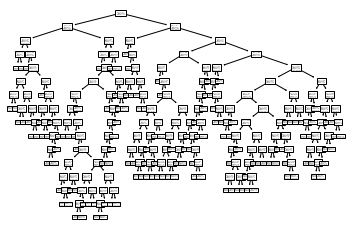

In [75]:
tree.plot_tree(decision_tree=model);

## Model Interpretation

> Why `sex` is the most important column? What has to do with **EDA** (Exploratory Data Analysis)?

In [76]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Prediction vs Reality

> How good is our model?

## Precision

> - `model.score()`

In [77]:
model.score(X,y)

0.896358543417367

In [79]:
type(y)

pandas.core.series.Series

In [80]:
y.to_frame()

,survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [82]:
dfsel = df[['survived']].copy()

In [86]:
predicciones = model.predict(X=X)

In [87]:
predicciones

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [93]:
dfsel["predicciones"] = predicciones

In [94]:
dfsel

,survived,predicciones
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,1,1


In [95]:
'a' == 'a'

True

In [96]:
1 == 0

False

In [97]:
dfsel["survived"] == dfsel["predicciones"]

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Length: 714, dtype: bool

In [98]:
res = dfsel["survived"] == dfsel["predicciones"]

In [100]:
res.count()

714

In [102]:
res.value_counts()

True     640
False     74
dtype: int64

In [103]:
res

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Length: 714, dtype: bool

In [104]:
type(res)

pandas.core.series.Series

In [108]:
df.sex_male.index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=714)

In [109]:
df.sex_male.values

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [110]:
df.sex_male.name

'sex_male'

In [111]:
df.sex_male.dtype

dtype('uint8')

In [112]:
res.sum()

640

In [113]:
res.sum()/res.count()

0.896358543417367

In [114]:
model.score(X,y)

0.896358543417367

## Confusion Matrix

> 1. **Sensitivity** (correct prediction on positive value, $y=1$)
> 2. **Specificity** (correct prediction on negative value $y=0$).

## ROC Curve

> A way to summarise all the metrics (score, sensitivity & specificity)